In [1]:
import meep as mp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.constants as spy
import time
from numpy.fft import fft, ifft, fftfreq

In [2]:
def Dnsqt(omega,T):
    return np.sqrt(6*spy.hbar**2*abs(omega)/(np.exp(spy.hbar*abs(omega)/spy.k/T)-1)/T**2/np.pi/spy.k**2)

In [3]:
def rand():
    return np.random.normal(0,1)

In [4]:
M = 2**(21)
tsim=7e-12
eps0 = 8.854187e-12
delta1 = np.sqrt(2/(eps0*6*spy.hbar*spy.c)) *spy.k
def Es(tj,T):
    Es0 = rand()*np.sqrt(6*spy.hbar/spy.k/np.pi/T)
    Esm = 0
    for j in range(1,M-1,1):
        wj = 2*np.pi*j/tsim
        Esm = Esm + (rand()*np.cos(wj*tj)-rand()*np.sin(wj*tj))*Dnsqt(wj,T)
    wf = 2*np.pi*M/tsim
    Esf =  (rand()*np.cos(wf*tj)-rand()*np.sin(wf*tj))*Dnsqt(wf,T)
    return delta1*T*(Es0 + 2*Esm + Esf)/np.sqrt(tsim)

/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


(1e-17, 2e-15)

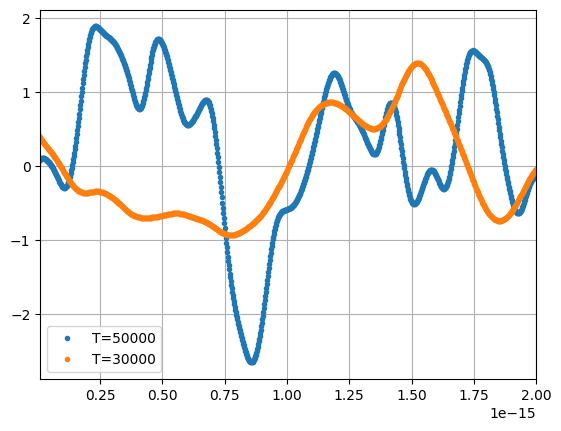

In [5]:
tl = np.linspace(0,2e-15,1000)
T1 = 50000
T2 = 30000
plt.plot(tl,Es(tl,T1),'.',label = 'T=50000',linewidth=1.5)
plt.plot(tl,Es(tl,T2),'.',label = 'T=30000',linewidth=1.5)
plt.legend()
plt.grid()
plt.xlim(0.01*1e-15,2*1e-15)